In [87]:
import numpy as np
import NR_a2_1_utils as utils1
import NR_a2_3_utils as utils3
from matplotlib import pyplot as plt
from importlib import reload
from scipy import stats
reload(utils1)
reload(utils3)
seed = 42
print('Original seed:',seed)
rng = utils1.rng(seed)
from tqdm import tqdm

Original seed: 42


# 3. Linear Structure growth

In [2]:
#reload(utils3)
#ode = lambda y,t : -y
#ode_int = utils3.runge_kutta(0,10,ode,10)
#print(ode_int)
#reload(utils3)
#ode = lambda y,t : -y*t
#ode_int = utils3.runge_kutta(0,10,ode,10)
#print(ode_int)

In [3]:
reload(utils3)
f = lambda t,x1,x2: x2
g = lambda t,x1,x2: -4/(3*t)*x2 + 2/(3*t**2)*x1
case1,yt1 = utils3.runge_kutta2nd(3,2,1,1000,f,g)
case2,yt2 = utils3.runge_kutta2nd(10,-10,1,1000,f,g)
case3,yt3 = utils3.runge_kutta2nd(5,0,1,1000,f,g)
print(f'case1: {case1},case2: {case2}, case3: {case3}')

case1: 179759.9884607269,case2: 606.5532637765943, case3: 179881.2991134862


In [4]:
reload(utils3)
f = lambda t,x1,x2 : x2
g = lambda t,x1,x2 : x1*6-x2

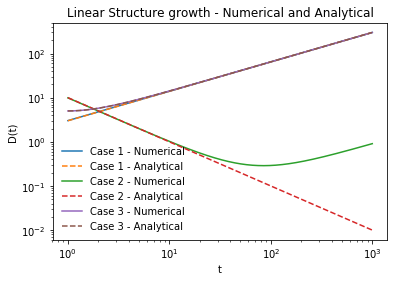

In [5]:
#D = lambda t,c1,c2 : c1*t**(2/3)+c2/t
D1 = lambda t : 3*t**(2/3)
D2 = lambda t : 10/t
D3 = lambda t : (3*t**(5/3)+2)/t
t = np.arange(1,1000+0.01,0.01)
plt.plot(t,yt1,label='Case 1 - Numerical')
plt.plot(t,D1(t),linestyle='--',label='Case 1 - Analytical')
plt.plot(t,yt2,label='Case 2 - Numerical')
plt.plot(t,D2(t),linestyle='--',label='Case 2 - Analytical')
plt.plot(t,yt3,label='Case 3 - Numerical')
plt.plot(t,D3(t),linestyle='--',label='Case 3 - Analytical')
plt.legend(frameon=False)
plt.xlabel('t')
plt.ylabel('D(t)')
plt.title('Linear Structure growth - Numerical and Analytical')
plt.xscale('log')
plt.yscale('log')

# 4. Zeldovich Approximation

Integrate up to $z=50$: 

$D(z) = \frac{5\Omega_mH_0^2}{2}H(z)\int_z^\infty\frac{1+z'}{H^3(z')}dz'$

Where: 

$H(z)^2 = H^2_0(\Omega_m(1+z)^3+\Omega_\Lambda)$



In order to avoid having to integrate up to $\infty$ we will be substituting $z = \frac{1}{a} -1$. This gives us the following equations: 


$ D(a) = \frac{5\Omega_mH_0^2}{2}H(a)\int_0^a\frac{1}{a^3H^3(a')}da'$

Where: 

$H(a)^2 = H^2_0(\frac{\Omega_m}{a^3}+\Omega_\Lambda)$

In [97]:
omega_m = 0.3
omega_lambda = 0.7
H0 = 70 # km/s/Mpc

H = lambda a : (H0**2*(omega_m*(a)**(-3)+omega_lambda))**0.5
D_prefactor = lambda a : (5*omega_m*H0**2)/2*H(a)
D_int = lambda a: 1/(a*H(a))**3
a = 1/51
D = lambda a: D_prefactor(a) * utils1.romber_int(D_int,1e-12,a)
print(D(a))

0.01961021426458253


In [7]:
reload(utils1)
dDdt = lambda a: utils1.romber_int(D_int,1e-12,a)*5/2*omega_m*H0**4*(-2*omega_m*a**(-3)+omega_lambda)
dDdt_analytic = dDdt(a)
dDdt_numerical = utils1.ridders_diff(D,np.array([a]))

print(dDdt_analytic,dDdt_numerical)

-547.6695899239868 [1.00011134]


/home/vbuchem/Documents/numerical_recipes/a2/NR_a2_1_utils.py:16: RuntimeWarning: overflow encountered in long_scalars
  self.state = self.a*(x&(2**32-1))+(x>>32)


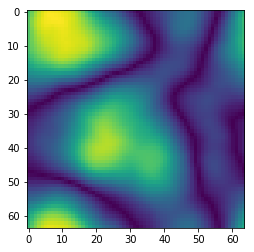

In [78]:
reload(utils3)
ck,Sx,Sy = utils3.random_field_generator_zeld(64,rng)
#ck = np.fft.ifft2(ck)
plt.imshow(np.abs(np.fft.ifft2(ck)))

In [123]:
N = 64
q = np.zeros((N,N,2))

for i in range(len(q)):
    for j in range(len(q)):
        q[i][j] = i,j
       

Sx = np.fft.ifft2(Sx).real*N
Sy = np.fft.ifft2(Sy).real*N

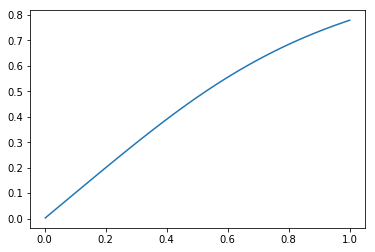



  0%|          | 0/90 [00:00<?, ?it/s]

  1%|          | 1/90 [00:00<00:11,  7.93it/s]

  2%|▏         | 2/90 [00:00<00:11,  7.77it/s]

  3%|▎         | 3/90 [00:00<00:11,  7.87it/s]

  4%|▍         | 4/90 [00:00<00:10,  7.85it/s]

  6%|▌         | 5/90 [00:00<00:10,  7.84it/s]

  7%|▋         | 6/90 [00:00<00:10,  7.76it/s]

  8%|▊         | 7/90 [00:00<00:11,  6.96it/s]

  9%|▉         | 8/90 [00:01<00:11,  7.04it/s]

 10%|█         | 9/90 [00:01<00:11,  7.16it/s]

 11%|█         | 10/90 [00:01<00:11,  7.01it/s]

 12%|█▏        | 11/90 [00:01<00:11,  7.01it/s]

 13%|█▎        | 12/90 [00:01<00:10,  7.33it/s]

 14%|█▍        | 13/90 [00:01<00:10,  7.39it/s]

 16%|█▌        | 14/90 [00:01<00:10,  7.40it/s]

 17%|█▋        | 15/90 [00:02<00:10,  7.46it/s]

 18%|█▊        | 16/90 [00:02<00:10,  7.38it/s]

 19%|█▉        | 17/90 [00:02<00:09,  7.46it/s]

 20%|██        | 18/90 [00:02<00:09,  7.52it/s]

 21%|██        | 19/90 [00:02<00:09,  7.49it/s]

 22%|██▏       | 20/90 [00:02<00:09,

In [ ]:
x = np.zeros((N,N,2))
a = np.linspace(0.0025,1,90)
Da = np.zeros(len(a))
for i in range(len(a)):
    Da[i] = D(a[i])
plt.plot(a,Da)
plt.show()

for k in tqdm(range(0,90)):
    for i in range(N):
        for j in range(N):
            x[i][j][0] = (q[i][j][0]+Da[k]*Sx[i][j])%N
            x[i][j][1] = (q[i][j][1]+Da[k]*Sy[i][j])%N
            
    plt.scatter(x[:,:,0],x[:,:,1],marker='.')
    plt.savefig('./plots/snap%04d.png'%k)
    plt.close()
#plt.scatter(q[:,:,0],q[:,:,1],marker='.')
#plt.show()



# 5.Mass assignment schemes

In [87]:
def bit_reverser64(n,width=6):
    b = '{:0{width}b}'.format(n, width=width)
    return int(b[::-1], 2)

In [92]:
a = np.arange(0,64,1)
#temp_a = np.zeros(0,8,1)
for i in range(len(a)):
    a[i] = bit_reverser64(a[i])


In [203]:
a = np.arange(0,8,1)
#print(a)
print(np.fft.fft(a))

for i in range(len(a)):
    a[i] = bit_reverser64(a[i],width=3)
N = 8
x = np.zeros(len(a),dtype=complex)

for j in range(1,np.int(np.log2(N))+1):
    Nj = 2**j
    for k in range(0,Nj-1):
        for i in range(k,N//Nj):
            m = i*Nj
            x[m] = a[m] + np.exp(2j*np.pi*k/Nj)*a[m+Nj//2]
            x[m+Nj//2] = a[m] - np.exp(2j*np.pi*k/Nj)*a[m+Nj//2]
print(x)

x = np.array([[1,2,3],[1,2,3]])
print(x[:,1])
print(x[1])

[28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
[ 1.+0.j -4.+0.j -2.+0.j -4.+0.j -1.+0.j -4.+0.j  1.-3.j -4.+0.j]
[2 2]
[1 2 3]


In [213]:
def fft1D(x,Nj,start=0,step=1):
    if Nj%2 > 0:
        raise ValueError('Size of input array must be a power of 2')
    if Nj == 1: 
        return [x[start]]
    new_step = step*2
    hNj = Nj//2
    rs = fft(x,hNj,start,new_step)+fft(x,hNj,start+step,new_step)
    for i in range(hNj):
        rs[i],rs[i+hNj]=rs[i]+np.exp(-2j*np.pi*i/Nj)*rs[i+hNj],rs[i]-np.exp(-2j*np.pi*i/Nj)*rs[i+hNj]
    return rs

def fft2D(x):
    if Nj%2 > 0:
        raise ValueError('Size of input array must be a power of 2')
    x = np.array(x,dtype=complex)
    if len(x.shape) == 2:
        for i in range(x.shape[1]):
            x[:,i] = fft1D(x[:,i],len(x[1]))
        for j in range(x.shape[0]):
            x[j] = fft1D(x[j],len(x[0]))
        return x

def fft3D(x):
    if Nj%2 > 0:
        raise ValueError('Size of input array must be a power of 2')
    x = np.array(x,dtype=complex)
    for i in range(x.shape[1]):
        x[:,i] = fft2D(x[:,i],len(x[1]))
    for j in range(x.shape[0]):
        x[j] = fft2D(x[j],len(x[0]))
    return x
    
    

In [218]:
np.random.seed(42)
a1 = np.arange(0,8,1)
print(fft1D(a1,len(a1)))
a2 = np.random.normal(size=(8,8))
#print(fft2D(a2))
#print(np.fft.fft2(a2))
a3 = np.random.normal(size=(8,8,8))
print(fft3D(a3))
print(np.fft.fftn(a3))

[(28+0j), (-4+9.65685424949238j), (-4+4j), (-4+1.6568542494923797j), (-4+0j), (-4-1.6568542494923806j), (-3.9999999999999996-4j), (-3.9999999999999987-9.65685424949238j)]
None
[[[  1.92318609+0.00000000e+00j   9.56295815-4.39296455e+01j
    -2.24507236-7.20498830e+00j -23.34095637+1.59610648e+00j
     1.11627153+0.00000000e+00j -23.34095637-1.59610648e+00j
    -2.24507236+7.20498830e+00j   9.56295815+4.39296455e+01j]
  [-15.2755684 +1.91798189e+01j  11.49043017-8.54620293e+00j
     1.74110205+2.89034320e+01j  20.00074544+9.26812237e+00j
   -24.28949235-4.62040587e+00j  20.63052377+1.47215724e+01j
    17.60824148+7.36925154e+00j -22.70155982+5.39831919e+00j]
  [-13.48750876-5.55943002e-01j  -5.86264904+3.40249326e-01j
     5.28128367+1.95220499e+01j  14.27975605-9.49488509e+00j
    -7.18947683+1.47354480e+01j  23.24865324-1.52012753e+01j
    -5.25454642-1.47128349e+01j   6.03631895-2.72230765e+01j]
  [ 17.37121024-4.98629072e+00j   7.00169982+2.77341294e+00j
     1.57882131+3.33269299e+